In [2]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
# Load the dataset and preprocess as before
data = pd.read_csv('fer_2013csv.csv')
pixels = data['pixels'].tolist()


In [4]:
faces = []
for pixel_sequence in pixels:
    face = np.asarray([int(pixel) for pixel in pixel_sequence.split(' ')], dtype='float32')
    face = face.reshape(48, 48)  # Resize to 48x48
    faces.append(face)

faces = np.asarray(faces)
faces = np.expand_dims(faces, -1)
faces /= 255.0

emotions = pd.get_dummies(data['emotion']).values
X_train, X_test, y_train, y_test = train_test_split(faces, emotions, test_size=0.2, random_state=42)

In [5]:
# Improved CNN Architecture with Batch Normalization and Dropout
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(7, activation='softmax'))

In [6]:
# Compile the model
custom_optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/50


449/449 [==============================] - 70s 153ms/step - loss: 2.4913 - accuracy: 0.2215 - val_loss: 2.4332 - val_accuracy: 0.2488
Epoch 2/50
449/449 [==============================] - 69s 154ms/step - loss: 2.0998 - accuracy: 0.2948 - val_loss: 1.6435 - val_accuracy: 0.3945
Epoch 3/50
449/449 [==============================] - 69s 154ms/step - loss: 1.9202 - accuracy: 0.3426 - val_loss: 1.5022 - val_accuracy: 0.4418
Epoch 4/50
449/449 [==============================] - 69s 153ms/step - loss: 1.7676 - accuracy: 0.3811 - val_loss: 1.4470 - val_accuracy: 0.4663
Epoch 5/50
449/449 [==============================] - 68s 152ms/step - loss: 1.6575 - accuracy: 0.4077 - val_loss: 1.3960 - val_accuracy: 0.4834
Epoch 6/50
449/449 [==============================] - 68s 152ms/step - loss: 1.5721 - accuracy: 0.4288 - val_loss: 1.3592 - val_accuracy: 0.4971
Epoch 7/50
449/449 [==============================] - 68s 151ms/step - loss: 1.5196 - accuracy: 0.4455 - val_loss: 1.3340 - val_

In [8]:
# Evaluate the model on the test set
accuracy = model.evaluate(X_test, y_test)[1]
print(f"Test Accuracy: {accuracy * 100:.2f}%")

225/225 [==============================] - 6s 26ms/step - loss: 1.1476 - accuracy: 0.6089
Test Accuracy: 60.89%


In [15]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")


225/225 [==============================] - 22s 99ms/step - loss: 1.1476 - accuracy: 0.6089
Test Loss: 1.1476
Test Accuracy: 60.89%


In [16]:
# Generate predictions
y_pred = model.predict(X_test)


225/225 [==============================] - 27s 120ms/step


In [18]:
# Convert predictions and true labels to categorical labels
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

In [19]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

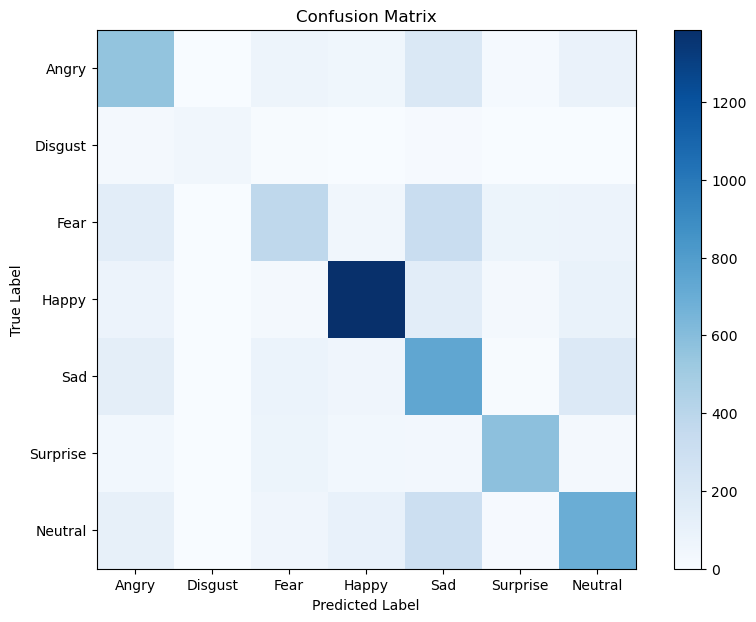

In [20]:

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=np.arange(7), labels=['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'])
plt.yticks(ticks=np.arange(7), labels=['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'])
plt.show()

In [21]:
# Print classification report
classification_rep = classification_report(y_true, y_pred, target_names=['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'])
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

       Angry       0.51      0.56      0.53       985
     Disgust       0.81      0.45      0.58       102
        Fear       0.54      0.36      0.43      1043
       Happy       0.82      0.79      0.80      1765
         Sad       0.42      0.61      0.50      1210
    Surprise       0.80      0.73      0.76       795
     Neutral       0.59      0.54      0.57      1278

    accuracy                           0.61      7178
   macro avg       0.64      0.58      0.60      7178
weighted avg       0.63      0.61      0.61      7178



In [23]:
# Save the model for future use
model.save('emotiondetection_model.h5')